In [1]:
import pandas as pd
import tensorflow as tf



In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/heart-disease.csv')

Mounted at /content/gdrive


In [3]:
print(df.head())
df.columns

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
X = df.drop("target", axis =1)
y = df["target"]
X



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import numpy as np

In [74]:
#np.random.seed(2)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.2))

model = tf.keras.Sequential([
      layers.Dense(units=12, activation="relu", input_shape=[13]),
      #layers.Dense(8, activation="relu"),
      layers.Dense(1, activation='sigmoid')
      ])


In [75]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],         
    )

In [76]:
early_stopping = callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.001,
    restore_best_weights = True
)

In [77]:
r = model.fit(
    X_train,y_train,
    validation_data = (X_test, y_test),
    verbose = 2,
    batch_size=10,
    callbacks=[early_stopping],
    epochs=100,
)

Epoch 1/100
25/25 - 1s - loss: 5.1905 - accuracy: 0.4669 - val_loss: 2.0416 - val_accuracy: 0.5902
Epoch 2/100
25/25 - 0s - loss: 2.1451 - accuracy: 0.4174 - val_loss: 2.0800 - val_accuracy: 0.2951
Epoch 3/100
25/25 - 0s - loss: 1.7641 - accuracy: 0.4380 - val_loss: 1.7542 - val_accuracy: 0.3115
Epoch 4/100
25/25 - 0s - loss: 1.6341 - accuracy: 0.4421 - val_loss: 1.9838 - val_accuracy: 0.3443
Epoch 5/100
25/25 - 0s - loss: 1.3942 - accuracy: 0.4793 - val_loss: 1.3422 - val_accuracy: 0.3443
Epoch 6/100
25/25 - 0s - loss: 1.2223 - accuracy: 0.4711 - val_loss: 1.3498 - val_accuracy: 0.3934
Epoch 7/100
25/25 - 0s - loss: 1.0346 - accuracy: 0.5207 - val_loss: 1.0441 - val_accuracy: 0.4262
Epoch 8/100
25/25 - 0s - loss: 0.8868 - accuracy: 0.5661 - val_loss: 0.8564 - val_accuracy: 0.4590
Epoch 9/100
25/25 - 0s - loss: 0.8356 - accuracy: 0.5744 - val_loss: 0.6338 - val_accuracy: 0.6721
Epoch 10/100
25/25 - 0s - loss: 0.6930 - accuracy: 0.6281 - val_loss: 0.8021 - val_accuracy: 0.5082
Epoch 11/

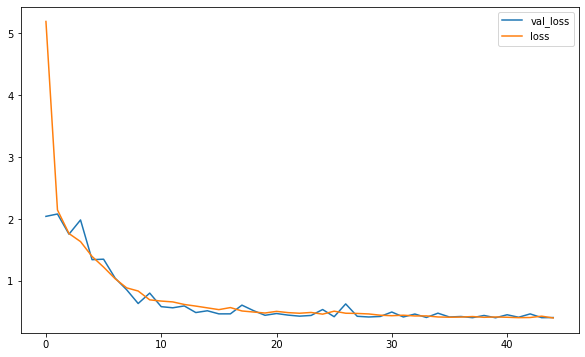

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [79]:
print('Train score : ', model.evaluate(X_train, y_train))
print('Test score : ', model.evaluate(X_test, y_test))

8/8 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8017
Train score :  [0.41336551308631897, 0.8016529083251953]
2/2 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8033
Test score :  [0.40358421206474304, 0.8032786846160889]
